# Introduction to Natural Language Processing: Assignment 1

In this assignment we'll practice word operations and text classifications.

- Please comment your code
- You can use built-in Python packages, scikit-learn and Pandas.
- Submissions are due **on Tuesdays at 23:59** and should be submitted **ONLY** on eCampus: **Assignmnets >> Student Submissions >> Assignment 1 (Deadline: 05.11.2024, at 23:59)**
- Name the file aproppriately "Assignment_1_\<Your_Name\>.ipynb".
- Please submit **ONLY** the Jupyter Notebook file.
- Please use relative path; Your code should work on my computer if the Jupyter Notebook and the file are both in the same directory.

Example: file_name = lemmatization-en.txt >> **DON'T use:** /Users/ComputerName/Username/Documents/.../lemmatization-en.txt

### Task 1.1 (2 points)

Write a function `extract_words_tokens(any_string)` that takes a string as input and returns two numbers:
1. num_words: The number of words in string
2. num_tokens: The number of tokens in string (Please use the character-based tokenization.)

**Hint:** The string can be a single word or a sentence and
 can contain some special charecters, such as: "!", ",", ":"

In [ ]:
def extract_words_tokens(any_string):
    #here comes your code
    num_words = len(any_string.split())
    num_tokens = len([char for char in any_string])
    return(print(any_string, ":", "num_words:", num_words, "and", "num_tokens:", num_tokens, "respectively"))

### Task 1.2 (4 points)

Write a function `lemmatize(any_string, file_name)` that takes as input any string and a file-name: `lemmatization-en.txt` (please download the file [here](https://github.com/michmech/lemmatization-lists/blob/master/lemmatization-en.txt). It's a tab separated corpus) and returns a dictionary with all words as keys and the lemma of the words as values.

**Hint:** To tokenize the string, please use the whitespace as the seperator. The string doesn't contain any special characters.

In [8]:
def lemmatize(any_string, file_name):
    #here comes your code
    tokens = any_string.split()
    dictionary_of_lemmatized_words = {}
    print(tokens)
    with open(file_name, "r") as file:
        for line in file:
            lemma, word = line.split(sep="\t")
            if word in tokens:
                dictionary_of_lemmatized_words[word] = lemma
    return(print(dictionary_of_lemmatized_words))

In [9]:
lemmatize("I played badminton today", "lemmatization-en.txt")

['I', 'played', 'badminton', 'today']
{}


### Task 2 (1 point)

Create a DataFrame using the `polarity.txt` file and give name to the columns appropriately. (e.g., "Text", "Label")

In [1]:
#here comes your code
import pandas as pd

df = pd.read_csv("polarity.txt", sep="\t", header=None)
df.columns = ["Text", "Label"]

### Task 2.1 (2 point)

Create a new column for the DataFrame that contains labels converted to numerical values instead of strings using the function: `apply()` and drop the original column afterwards.

Hint: The numarical values can be any meaningful values, e.g., pos >> 1 and neg >> 0

In [ ]:
# here comes your code
df["Label_Num"] = df.apply(lambda x: 1 if x["Label"] == "pos" else 0, axis=1)
df.drop("Label", axis=1, inplace=True)

### Task 3 (7 points)

Write a function `create_count_and_probability` that takes a file (`corpus.txt`) as input and returns a csv file as output containing three columns:
1. Text
2. Count_Vector
3. Probability

Example:

For the line: `This document is the second document.`

The row in the csv file should contain:
`This document is the second document.`   `[0,2,0,1,0,1,1,0,1]`   `[1/6, 2/6, 1/6, 1/6, 1/6, 2/6]`

**Note**:

1. You should define your own function and not use e.g., CountVectorizer() which gives you the `count vector`, directly.

2. You can either use the whitespace in `split` as the seperator or use the `Regular Expression (re)` to extract the words, as follows:

```
import re
TEXT = "Hey, - How are you doing today!?"
words_list = re.findall(r"[\w']+", TEXT)
print(words_list)
```

3. To count the words, you can use e.g., the library: `collections`, more specifically `Counter`.

4. Please don't upload the output file. Your function should generate the file.

In [10]:
import collections
def create_count_and_probability(file_name):
    # here comes your code
    txt = ""
    with open(file_name, "r") as file:
        for line in file:
            words = line.split()
            count = collections.Counter(words)
            total = sum(count.values())
            probability = [count[word]/total for word in count.keys()]
            
            # output line
            txt += line.strip() + "," + str(list(count.values())) + "," + str(probability) + "\n"

    with open("count_and_probability.txt", "w") as csv_file:
        csv_file.write(txt)

In [11]:
create_count_and_probability('./corpus.txt')

### Task 4 (8 points)

The goal of this task is to train and test classifiers provided in scikit-learn, using two datasets `rural.txt` and `science.txt`.

a) Each file (rural and science) contains sentence-wise documents. You should create a dataframe containing two columns: "Document" and " Class", as shown below. This dataframe will be used later as input for the vectorizer.

|Document                             |Class |
| ------------------------------------|----- |
|PM denies knowledge of AWB kickbacks | rural |
|The crocodile ancestor fossil, found...| science |


b) Remove stop words from the data and create two separate plots showing word frequency for documents in each label.

c) Split the data into train (70%) and test (30%) sets and use the following vectorization techniquess to train the two classifiers provided by scikit-learn:

- one-hot-encoding
- count vectorization

Classifiers:
- naive_bayes.GaussianNB()
- LogisticRegression()

**Hints:**
1. The Gaussian NB Classifier takes a dense matrix as input and the output of the vectorizer is a sparse matrix. Use my_matrix.toarray() for this conversion.
2. You can play around with various parameters in both the count-vectorizer and the classifier to get a better performance in terms of the accuracy. (In the exercise, we will discuss the accuracy of your model.)

In [13]:
# here comes your code
import pandas as pd
# from nltk.corpus import stopwords

# read the data
rural = open("rural.txt", "r").read()
rural = rural.split("\n")

rural_df = pd.DataFrame(rural)
rural_df.columns = ["Document"]
rural_df["Class"] = "rural"
print(rural_df.shape)

science = open("science.txt", "r").read()
science = science.split("\n")

science_df = pd.DataFrame(science)
science_df.columns = ["Document"]
science_df["Class"] = "science"
print(science_df.shape)

# concatenate the data
df = pd.concat([rural_df, science_df], axis=0)
print(df.shape)

(550, 2)
(574, 2)
(1124, 2)


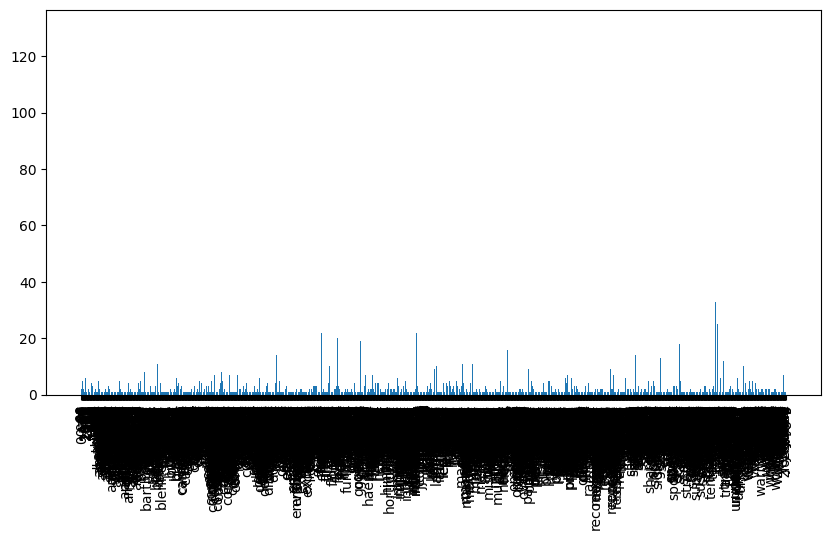

In [12]:
# create a bag of words
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words="english")
X = vectorizer.fit_transform(rural_df["Document"])

import matplotlib.pyplot as plt

# plot the word frequency
plt.figure(figsize=(10, 5))
plt.bar(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0))
plt.xticks(rotation=90)
plt.show()

In [16]:
# create a bag of words
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words="english")
X = vectorizer.fit_transform(science_df["Document"])

import matplotlib.pyplot as plt

# plot the word frequency
# plt.figure(figsize=(10, 5))
# plt.bar(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0))
# plt.xticks(rotation=90)
# plt.show()

In [19]:
df

,Document,Class
0,PM denies knowledge of AWB kickbacks,rural
1,The Prime Minister has denied he knew AWB was ...,rural
2,Letters from John Howard and Deputy Prime Mini...,rural
3,In one of the letters Mr Howard asks AWB manag...,rural
4,The Opposition's Gavan O'Connor says the lette...,rural
...,...,...
569,Sutherland says laboratory tests show the DS4G...,science
570,"""The underlying technology has been around for...",science
571,Sutherland says missions to Pluto and the Kuip...,science
572,"""All of that within the working lifetime of a ...",science


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

# encode the class
encoder = OneHotEncoder()
column_transformer = make_column_transformer((encoder, ["Class"]))
df["Class"] = column_transformer.fit_transform(df)

# split the data
X_train, X_test, y_train, y_test = train_test_split(df["Document"], df["Class"], test_size=0.3, random_state=24)

# create a bag of words
vectorizer = CountVectorizer(stop_words="english")
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# train the model
model = GaussianNB()
model.fit(X_train.toarray(), y_train)

# predict the test data
y_pred = model.predict(X_test.toarray())

# evaluate the model
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9023668639053254


In [25]:
from sklearn.linear_model import LogisticRegression

# train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# predict the test data
y_pred = model.predict(X_test)

# evaluate the model
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9289940828402367
